# Dashboard

In [53]:
import panel as pn
import pandas as pd

## Import notebooks

### Data analysis

In [54]:
%run graphs.ipynb

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_61550/1145220907.py:9: UserWarning:

Using Panel interactively in VSCode notebooks requires the jupyter_bokeh package to be installed. You can install it with:

   pip install jupyter_bokeh

or:
    conda install jupyter_bokeh

and try again.



interactive(children=(SelectMultiple(description='Barrios', index=(46,), layout=Layout(width='50%'), options=(…

### ML model

                   R2 Score       MSE
Model                                
Random Forest      0.634591  0.725693
Gradient Boosting  0.636720  0.721464
Ridge Regression   0.438335  1.115451
=== Random Forest ===
      feature  importance
4  unemp_rate    0.357050
1  stops_rate    0.294965
3   rail_rate    0.184716
0    acc_rate    0.111318
2     no2_avg    0.051950

=== Gradient Boosting ===
      feature  importance
4  unemp_rate    0.359197
3   rail_rate    0.236613
1  stops_rate    0.227995
0    acc_rate    0.122857
2     no2_avg    0.053338



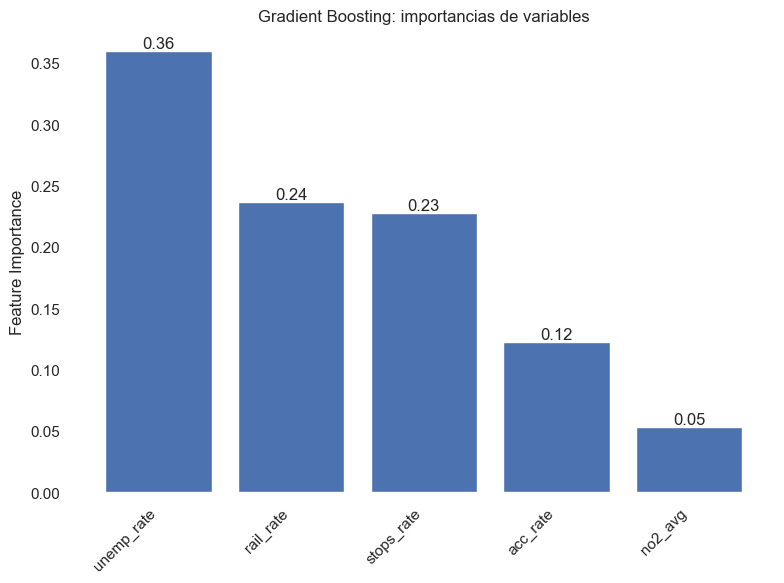

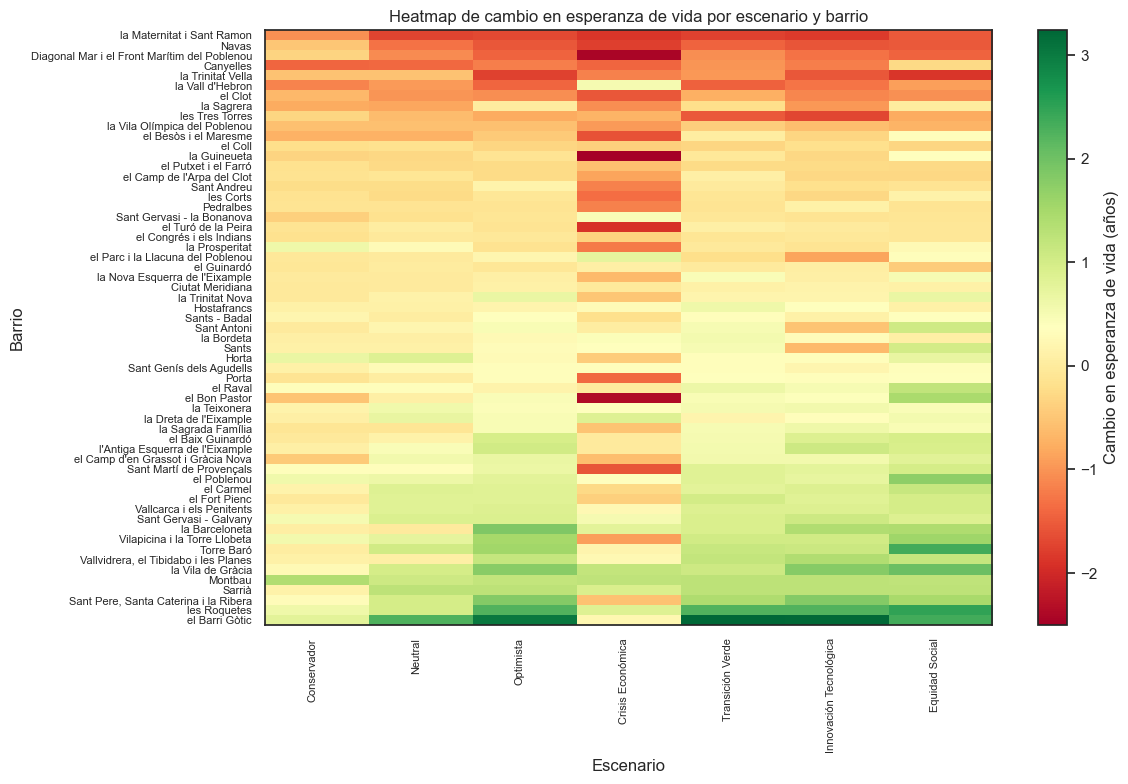

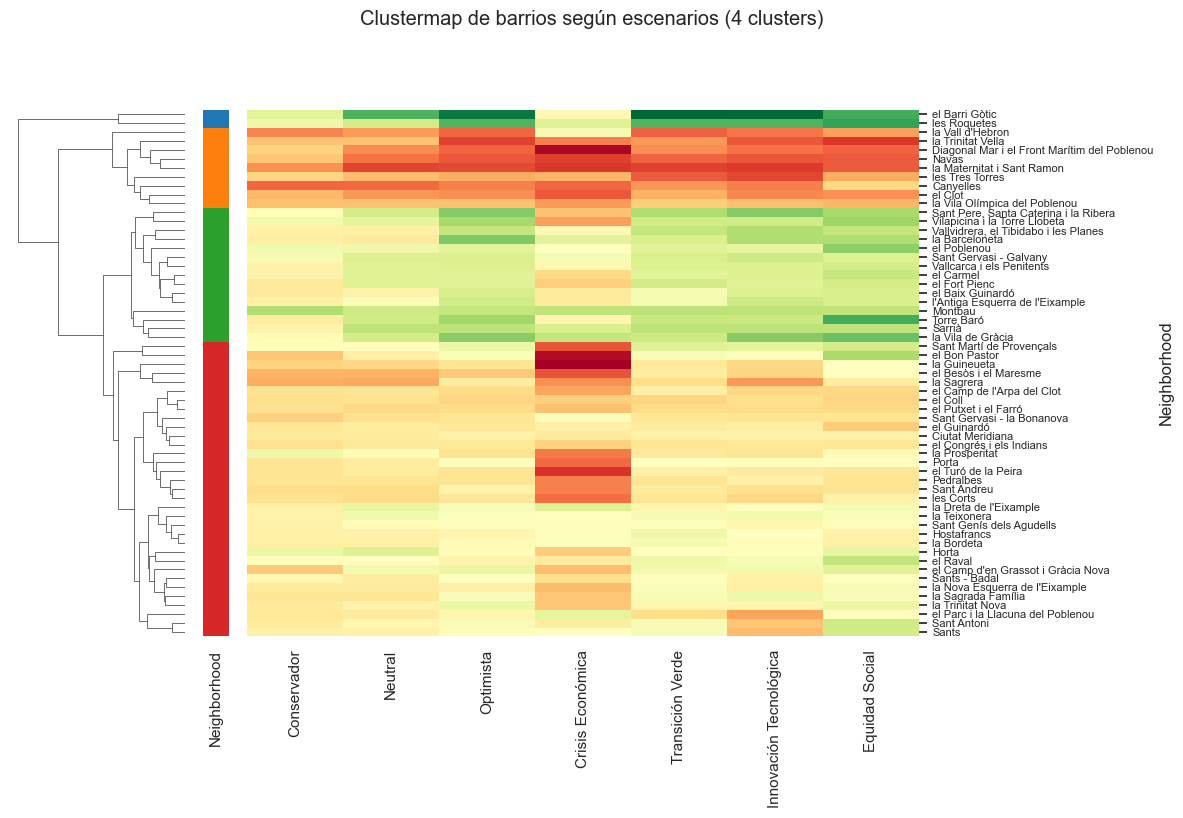

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_61550/490463148.py:18: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



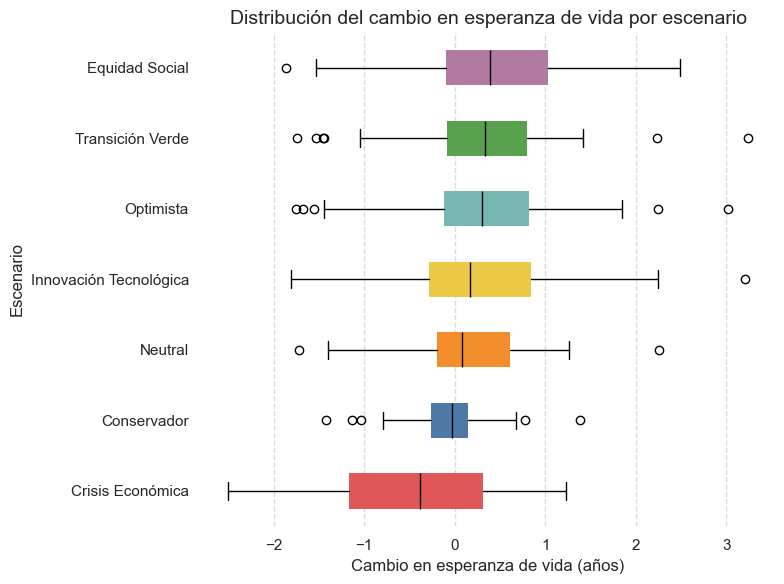

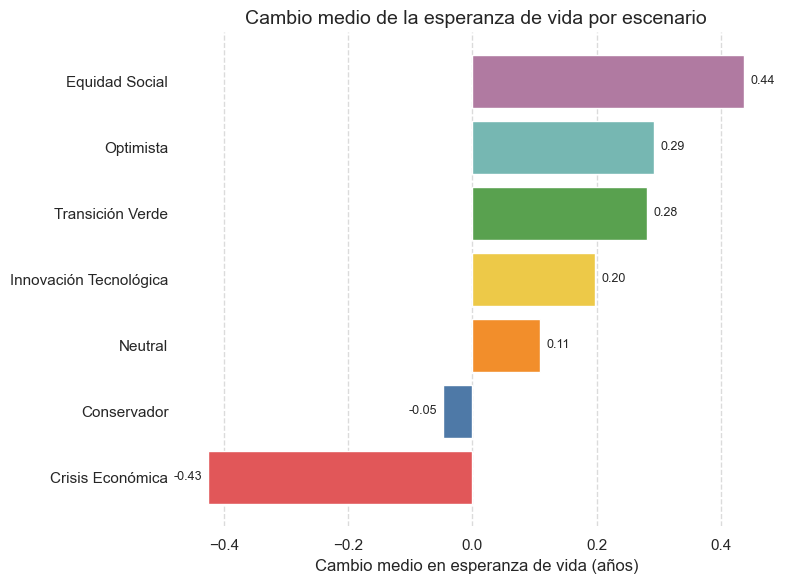

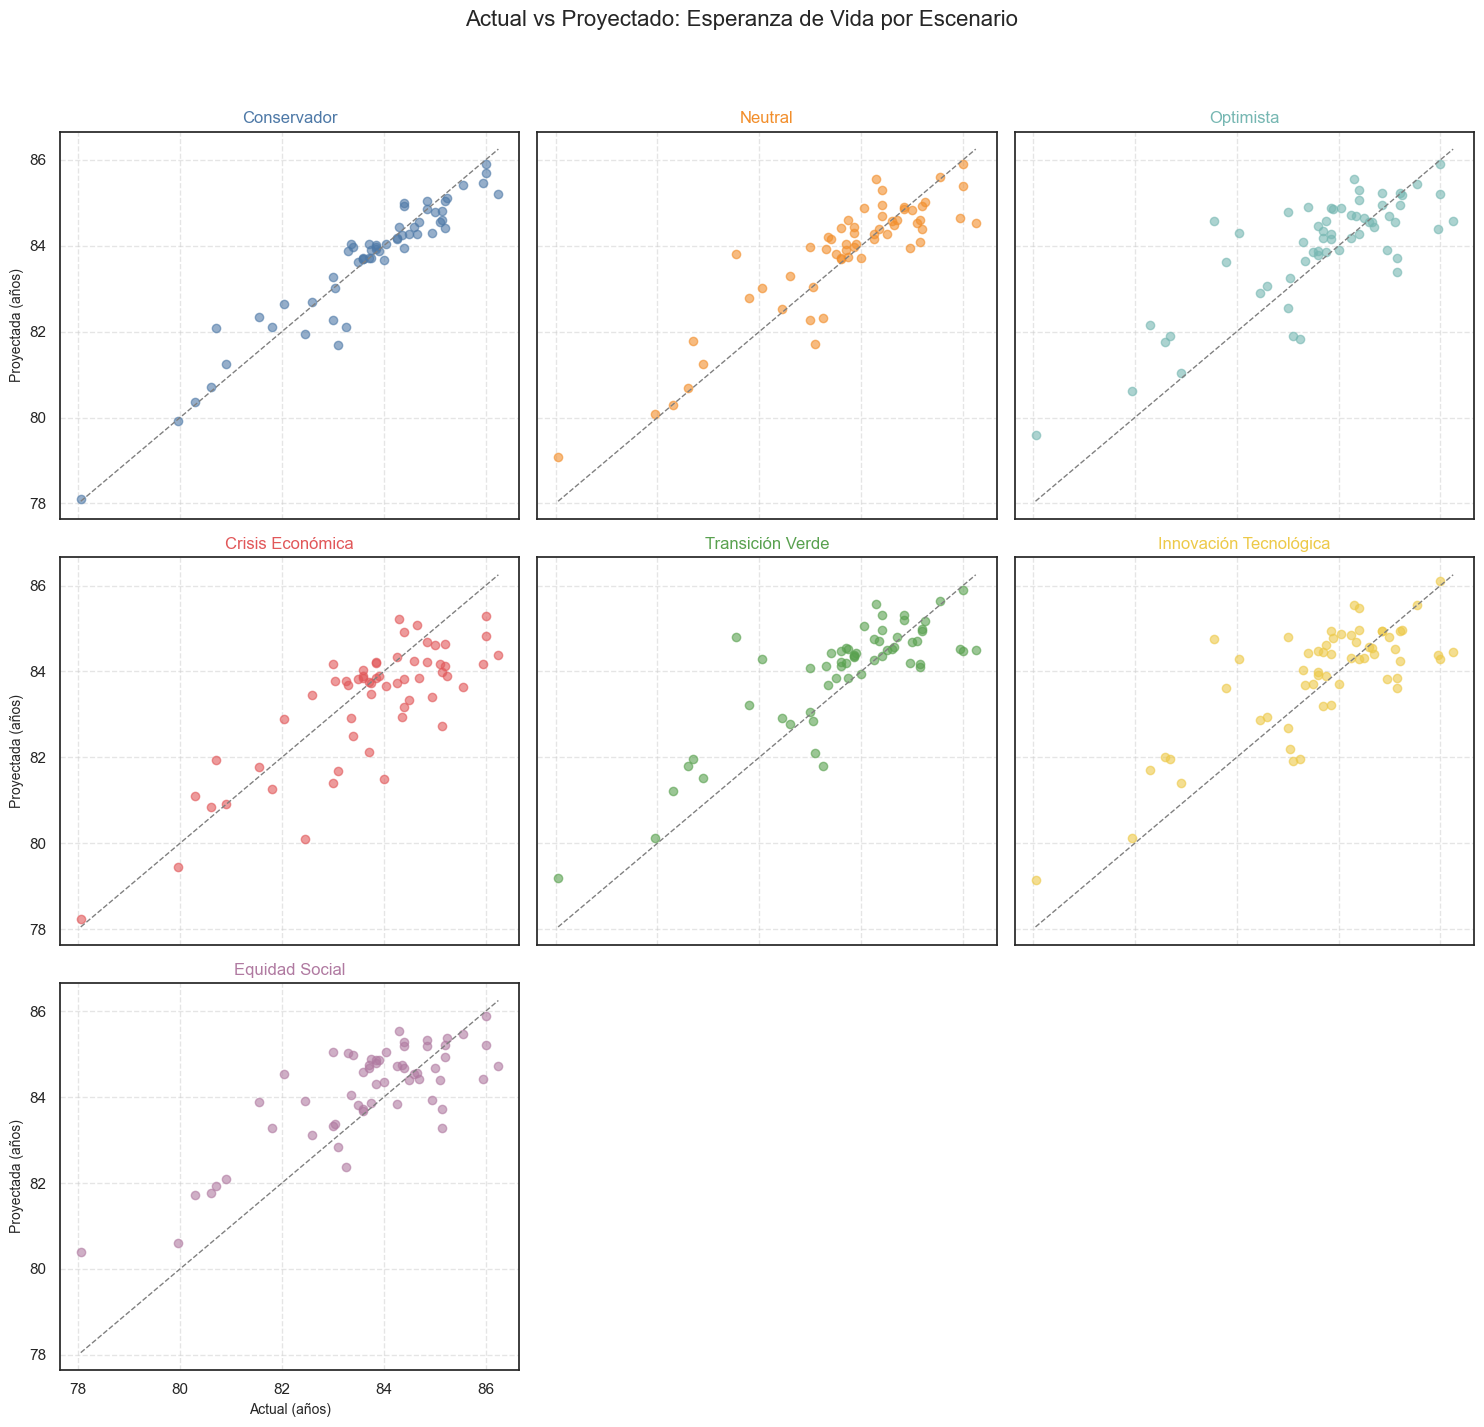

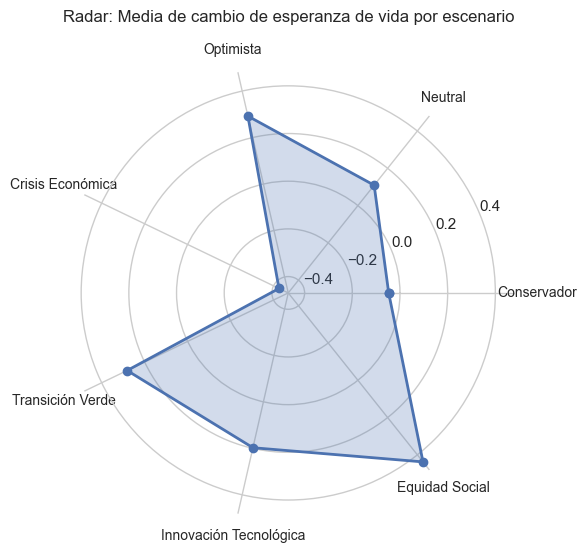

In [55]:
%run model_ml.ipynb

## Fondo tabs

In [56]:
# Pane HTML que pinta el fondo de la intro
intro_html = pn.pane.HTML("""
<div style="
    position: fixed;
    width: 100vw;
    height: 100vh;
    background-image: url('images/background.png');
    background-size: cover;
    background-position: center;
    z-index: -1;
">
</div>
""", sizing_mode="stretch_both")

In [57]:
# Logo
logo_tabs = pn.pane.PNG("images/logo.png", width=500)

## Intro 

In [58]:
pn.extension()

# Layout final con todo centrado
intro_tab = pn.Column(
    pn.Spacer(height=20),
    pn.Row(intro_html, align="center"),
    sizing_mode="stretch_width",
    align="center"
)

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_61550/3708019814.py:1: UserWarning:

Using Panel interactively in VSCode notebooks requires the jupyter_bokeh package to be installed. You can install it with:

   pip install jupyter_bokeh

or:
    conda install jupyter_bokeh

and try again.



## Datos

In [59]:
df = pd.read_csv("data/df_final.csv")
datos_tab = pn.Column(
    pn.Row(logo_tabs),
    "# 🧾 Datos",
    pn.widgets.DataFrame(df, width=1400, height=600),
    sizing_mode="stretch_width"
)

## Análisis de datos

In [60]:
# analisis_tab = pn.Column(
#     pn.Row(logo_tabs),
#     "# 🚌 Conexiones entre barrios por líneas de bus",
#     pn.Accordion(
#         ("Evolución temporal del desempleo", pn.pane.Matplotlib(plot_unemployment(selector_desempleo), tight=True, width=1200, height=600)),
#         # ("Calidad del aire", pn.pane.Matplotlib(fig_mean_diff, tight=True, width=1200, height=600)),

#     ),
#     sizing_mode='stretch_width'
# )

## Conexiones entre barrios por líneas de bus

In [61]:
# import panel as pn
# import param
# import geopandas as gpd
# import pandas as pd
# import shapely.wkt
# import networkx as nx
# import plotly.graph_objects as go

# pn.extension('plotly')

# def safe_load_geometry(wkt_str):
#     try:
#         return shapely.wkt.loads(wkt_str)
#     except Exception:
#         return None

# class BusGraphPanel(param.Parameterized):
#     barrio = param.ObjectSelector(default=None, objects=[])

#     def __init__(self, **params):
#         super().__init__(**params)

#         # Cargar datos
#         self.barrios_gdf = gpd.read_file('data/barris.geojson')
#         bus_lines_df = pd.read_csv("data/linies_bus.csv")
#         bus_lines_df["geometry"] = bus_lines_df["GEOMETRY"].apply(safe_load_geometry)
#         self.bus_lines_gdf = gpd.GeoDataFrame(bus_lines_df, geometry="geometry", crs="EPSG:4326")

#         # Crear grafo
#         self.G = nx.Graph()
#         for idx, row in self.barrios_gdf.iterrows():
#             self.G.add_node(row["NOM"], geometry=row.geometry)

#         for line in self.bus_lines_gdf.itertuples():
#             if not line.geometry:
#                 continue
#             touched_barrios = set()
#             for idx, barrio in self.barrios_gdf.iterrows():
#                 if line.geometry.intersects(barrio.geometry):
#                     touched_barrios.add(barrio["NOM"])
#             touched_barrios = list(touched_barrios)
#             for i in range(len(touched_barrios)):
#                 for j in range(i + 1, len(touched_barrios)):
#                     b1, b2 = touched_barrios[i], touched_barrios[j]
#                     if self.G.has_edge(b1, b2):
#                         self.G[b1][b2]["weight"] += 1
#                     else:
#                         self.G.add_edge(b1, b2, weight=1)

#         # Posiciones
#         self.pos = {node: (geom.centroid.x, geom.centroid.y)
#                     for node, geom in nx.get_node_attributes(self.G, 'geometry').items()}
#         nx.set_node_attributes(self.G, self.pos, 'pos')

#         self.node_data = [{'id': n, 'x': x, 'y': y} for n, (x, y) in self.pos.items()]
#         self.param.barrio.objects = [n['id'] for n in self.node_data]

#     @param.depends('barrio')
#     def view(self):
#         edge_traces = []
#         for u, v, data in self.G.edges(data=True):
#             x0, y0 = self.G.nodes[u]['pos']
#             x1, y1 = self.G.nodes[v]['pos']
#             edge_traces.append(go.Scatter(
#                 x=[x0, x1, None],
#                 y=[y0, y1, None],
#                 line=dict(width=data['weight'],
#                           color='red' if self.barrio in (u, v) else 'lightgray'),
#                 mode='lines',
#                 opacity=1.0 if self.barrio in (u, v) else 0.2,
#                 hoverinfo='text',
#                 text=[f"{u} ↔ {v}: {data['weight']} líneas"] * 3,
#                 showlegend=False
#             ))

#         node_trace = go.Scatter(
#             x=[n['x'] for n in self.node_data],
#             y=[n['y'] for n in self.node_data],
#             mode='markers+text',
#             text=[n['id'] for n in self.node_data],
#             textposition="top center",
#             hoverinfo='text',
#             marker=dict(size=10, color=[
#                 'orange' if n['id'] == self.barrio else 'skyblue' for n in self.node_data
#             ], line_width=2),
#             showlegend=False
#         )

#         fig = go.Figure(data=edge_traces + [node_trace])
#         fig.update_layout(
#             title="Conexiones entre barrios por líneas de bus",
#             margin=dict(b=20, l=5, r=5, t=40),
#             hovermode='closest',
#             xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
#             yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
#             width=700,      # fijo
#             height=450      # fijo
#         )

#         return pn.pane.Plotly(
#             fig,
#             config={'responsive': False}, 
#             sizing_mode='fixed',
#             width=700,
#             height=450
#         )

# # Función para usar como tab en el dashboard
# def crear_template_conexiones_bus():
#     app = BusGraphPanel()

#     # Construimos el Plotly pane con sizing y estilo para que sea totalmente responsivo
#     grafico_pane = pn.pane.Plotly(
#         app.view().object,               # extraemos la figura de Plotly
#         config={'responsive': True},
#         sizing_mode='stretch_both',
#         style={'width': '100%', 'height': '100%'}
#     )

#     # Template con sidebar y main
#     template = pn.template.FastListTemplate(
#         title="Conexiones Bus en Barcelona",
#         sidebar=[
#             pn.pane.Markdown("## Selecciona barrio"),
#             app.param.barrio
#         ],
#         main=[
#             pn.Row(grafico_pane, sizing_mode='stretch_both')
#         ],
#         accent_base_color="#F08080",
#         header_background="#8B0000"
#     )
#     return template


In [62]:
bus_tab = pn.Column(
    pn.Row(logo_tabs),
    "# 🚌 Conexiones entre barrios por líneas de bus",
    crear_tab_conexiones_bus(),
    sizing_mode="stretch_width"
)

## Escenarios de Predicción de Esperanza de Vida

In [63]:
prediccion_esp = pn.Column(
    pn.Row(logo_tabs),
    "# 📈 Escenarios de Predicción de Esperanza de Vida",
    pn.Accordion(
        ("Distribución del cambio en esperanza de vida por escenario", pn.pane.Matplotlib(fig_scenario_boxplot, tight=True, width=1200, height=600)),
        ("Cambio medio en esperanza de vida por escenario", pn.pane.Matplotlib(fig_mean_diff, tight=True, width=1200, height=600)),
        ("Actual vs Proyectado: Esperanza de Vida por Escenario", pn.pane.Matplotlib(fig_actual_vs_projected, tight=True, width=1200, height=600)),
        ("Radar: Media de cambio de esperanza de vida por escenario", pn.pane.Matplotlib(fig_radar_mean, tight=True, width=1200, height=600)),

        ("Heatmap de cambio en esperanza de vida por escenario y barrio", pn.pane.Matplotlib(fig_heatmap, tight=True, width=1200, height=600)),
        ("Clustermap de barrios según escenarios", pn.pane.Matplotlib(fig_clustermap, tight=True, width=1200, height=600))
    ),
    sizing_mode='stretch_width'
)

## Mapa de los escenarios

In [64]:
mapa_esp = pn.Column(
    pn.Row(logo_tabs),
    "# 🗺️ Mapa de los escenarios",
    pn.pane.plot.Folium(m, width=1200, height=600),
    sizing_mode="stretch_width"
)

## Tabs

In [65]:
pn.extension('tabulator')
pn.extension('plotly')
# Tabs
tabs = pn.Tabs(
    ("📘 Introducción", intro_tab),
    ("🧾 Datos", datos_tab),
    # ("📊 Análisis de datos", analisis_tab),
    ("🚌 Conexiones entre barrios por líneas de bus", bus_tab),
    ("🗺️ Mapa de los escenarios", mapa_esp),
    ("📈 Escenarios de Predicción de Esperanza de Vida", prediccion_esp),
    sizing_mode='stretch_both',
    width_policy='max',
    height_policy='max'
)

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_61550/4157410219.py:1: UserWarning:

Using Panel interactively in VSCode notebooks requires the jupyter_bokeh package to be installed. You can install it with:

   pip install jupyter_bokeh

or:
    conda install jupyter_bokeh

and try again.



/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_61550/4157410219.py:2: UserWarning:

Using Panel interactively in VSCode notebooks requires the jupyter_bokeh package to be installed. You can install it with:

   pip install jupyter_bokeh

or:
    conda install jupyter_bokeh

and try again.



## App

In [66]:
dashboard = pn.Column(tabs)
dashboard.save("dashboard_bcn.html", embed=True)